## 3. Ice cream prediction app

> [!NOTE]
> This requires some basic knowledge in regression, you can for example use random forest or simply linear regression with scikit-learn

Download this [ice cream data set](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue) and create a simple app in streamlit that lets the user enter a temperature in celsius and it outputs the revenue prediction. You can for example use random forest regression to predict the revenue.

In [137]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # Exempeldata
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import plotly.express as px

df = pd.read_csv("data/IceCreamData.csv")

# df.sort_values(by="Revenue").iloc[320:].head(60)
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [141]:
X = df[["Temperature"]]
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790101
438,17.132795


# Forest regression

In [108]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train,y_train)
forest_y_pred = forest_model.predict(X_test)

forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
forest_mae = mean_absolute_error(y_test, forest_y_pred)
forest_rmse = root_mean_squared_error(y_test, forest_y_pred)
forest_mse, forest_r2, forest_mae, forest_rmse

(994.6937427259509, 0.9651727333787384, 24.386675012882062, 31.53876571341927)

# Linear regression

In [109]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_y_pred = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_rmse = root_mean_squared_error(y_test, linear_y_pred)
linear_mse, linear_r2, linear_mae, linear_rmse

print(f"Linjär R2 = {linear_r2}  /  Forest R2 = {forest_r2}")
print(f"Linjär MAE = {linear_mae}  /  Forest MAE = {forest_mae}")
print(f"Linjär MSE = {linear_mse}  /  Forest MSE = {forest_mse}")
print(f"Linjär RMSE = {linear_rmse}  /  Forest RMSE = {forest_rmse}")

Linjär R2 = 0.9771532792713993  /  Forest R2 = 0.9651727333787384
Linjär MAE = 19.184547408370435  /  Forest MAE = 24.386675012882062
Linjär MSE = 652.5200612979733  /  Forest MSE = 994.6937427259509
Linjär RMSE = 25.544472225864705  /  Forest RMSE = 31.53876571341927


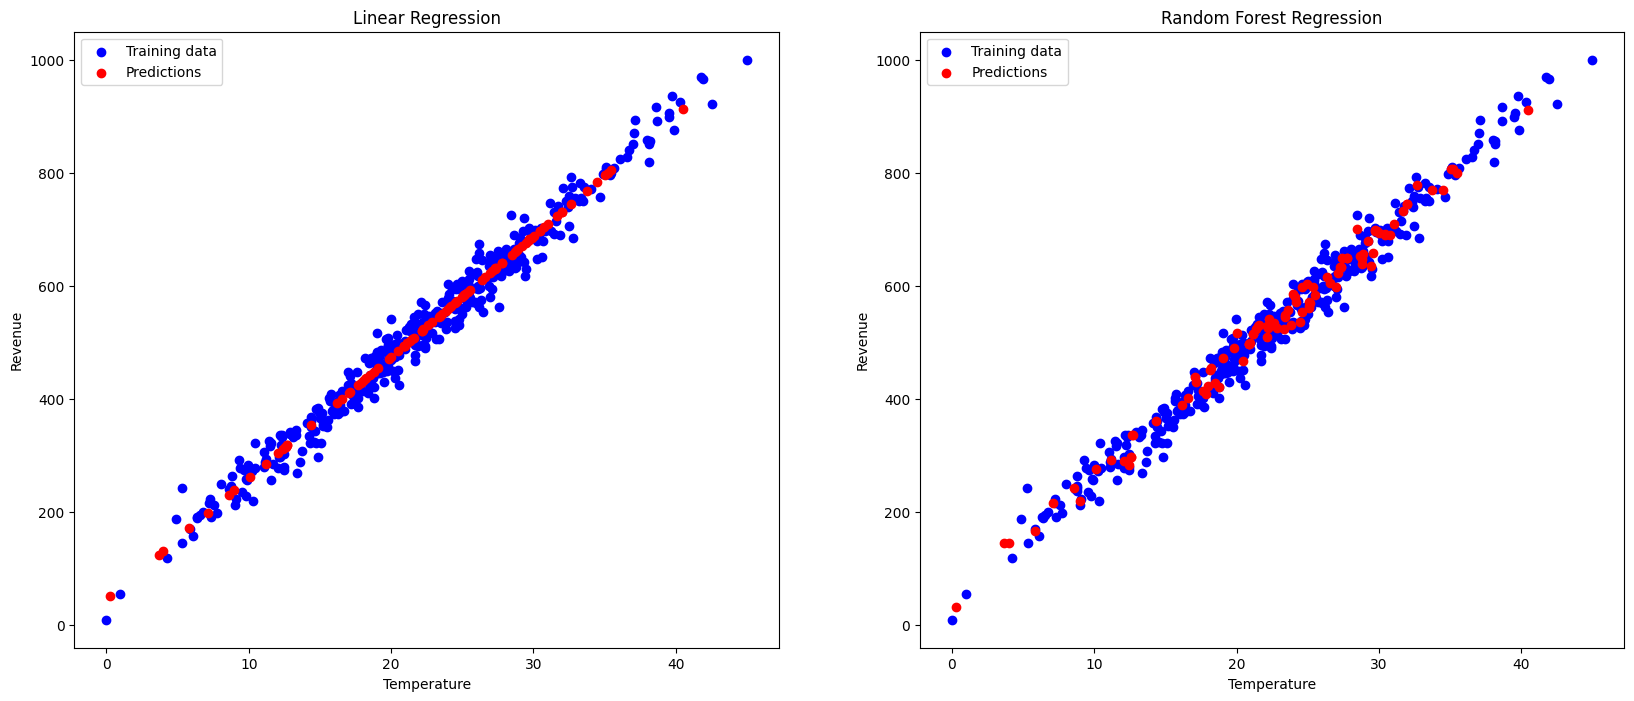

In [110]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2, figsize=(20,8))

ax[0].scatter(X_train, y_train, label="Training data", color="blue")
ax[0].scatter(X_test, linear_y_pred, label="Predictions", color="red")
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("Revenue")
ax[0].legend()

ax[1].scatter(X_train, y_train, label="Training data", color="blue")
ax[1].scatter(X_test, forest_y_pred, label="Predictions", color="red")
ax[1].set_title("Random Forest Regression")
ax[1].set_xlabel("Temperature")
ax[1].set_ylabel("Revenue")
ax[1].legend()


In [120]:
X_test, forest_y_pred
# temp = pd.Series(X_test)
# predictions = {
#     "Temperature": temp,
#     "Predicted Revenue": forest_y_pred 
# }
temp_prediction = X_test.round() 
temp_prediction["Predicted Revenue"] = forest_y_pred.round()
# predictions = pd.Series(predictions)
# revenue = temp_prediction[temp_prediction["Temperature"] == 29.704183]
# revenue
# revenue["Predicted Revenue"]
temp_prediction.sort_values(by="Temperature")


user_choice = temp_prediction[temp_prediction["Temperature"] == 35.0].mean().round()
user_choice = int(user_choice["Predicted Revenue"].item())
type(user_choice)

int

In [136]:
# choice = st.selectbox("Select temperature", temp_prediction["Temperature"].unique().round())
choice = 30
choice = np.array([[choice]])
    # user_choice = temp_prediction[temp_prediction["Temperature"] == choice].mean().round()
user_choice = forest_model.predict(choice)[0]
print(user_choice)
    # user_choice = int(user_choice["Predicted Revenue"].item())
    # st.markdown(f"### Expected revenue: {user_choice} SEK")
choice

695.5931636299999


c:\Users\organ\Repos\python\skola\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([[30]])